In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd, datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
San_Fran = pd.read_csv('Insert own path to data here')
Seattle = pd.read_csv('Insert own path to data here')

In [5]:
#set(San_Fran['Category'])
#set(San_Fran[San_Fran['Category'] == 'ASSAULT']['Descript'])

In [6]:
#set(San_Fran[San_Fran['Resolution'] != 'NONE']['Resolution'])

In [7]:
#San_Fran[San_Fran['Resolution'] == 'LOCATED'].groupby('Category').Category.count()

In [8]:
#San_Fran[(San_Fran['Resolution'] == 'LOCATED') & (San_Fran['Category'] == 'RUNAWAY')]

In [9]:
#San_Fran[San_Fran['Category'] == 'MISSING PERSON'].groupby('Resolution').Resolution.count()

In [10]:
SF_Missing_People = San_Fran[(San_Fran['Category'] == 'MISSING PERSON') & ((San_Fran['Resolution'] == 'LOCATED') | (San_Fran['Resolution'] == 'NONE'))]

In [11]:
SF_Missing_People['R_indicater'] = SF_Missing_People.Resolution.map(lambda x: 1 if x=='LOCATED' else 0)

In [12]:
test = SF_Missing_People.groupby('DayOfWeek').R_indicater.mean()
#test.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot()

In [13]:
test12 = SF_Missing_People.groupby('DayOfWeek').R_indicater.count()
#test12.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot()

In [14]:
SF_Missing_People.loc['HourofDay'] = SF_Missing_People.Time.map(lambda x: x[:2])

In [15]:
#(SF_Missing_People.groupby('HourofDay').R_indicater.mean())#.plot()

In [16]:
SF_Missing_People.loc['R_indicater'] = SF_Missing_People.Resolution.map(lambda x: 1 if x=='LOCATED' else 0)

In [17]:
test1 = San_Fran.groupby('DayOfWeek').Category.count()
#test1.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]#.plot()

In [18]:
San_Fran['HourofDay'] = San_Fran.Time.map(lambda x: x[:2])

In [19]:
#San_Fran.groupby('HourofDay').Category.count()#.plot()

In [20]:
San_Fran['R_indicater'] = SF_Missing_People.Resolution.map(lambda x: 0 if x=='NONE' else 1) 

In [21]:
test2 = San_Fran.groupby('DayOfWeek').R_indicater.sum()/San_Fran.groupby('DayOfWeek').Resolution.count()
#test2.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]#.plot()

In [22]:
#(San_Fran.groupby('HourofDay').R_indicater.sum()/San_Fran.groupby('HourofDay').Resolution.count())#.plot()

#It's better to go missing in San Francisco on Friday

Using data from [Socrata](https://www.socrata.com/) on crime statisitcs, I had a look at the variation of different crime rates with the day of the week. The data comes with a comment on Resolution, which indicates how the case is progressing. This column contains values ranging from "DISTRICT ATTORNEY REFUSES TO PROSECUTE" to "ARREST, BOOKED". This allows us to get a sense as to how successful the SFPD were at pursuing cases of different kinds.

Looking at Missing Person cases, there are two main outcomes - "LOCATED" and "NONE", making it very easy to indicate the outcome of this type case. Dividing the Missing Person cases with a successful outcome by the total number of such cases, we can see the average chance of a successful outcome. A adding in day of the week shows a interesting picture.

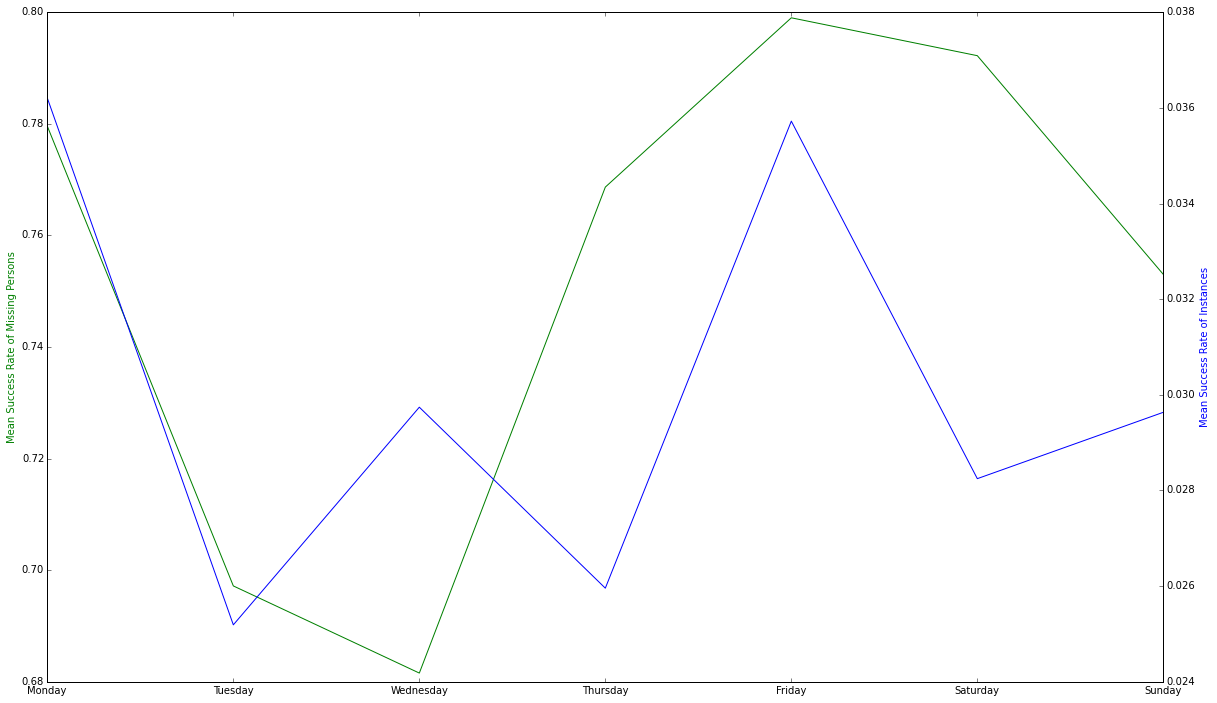

In [23]:
fig, ax1 = plt.subplots(figsize=(20,12))

ax2 = ax1.twinx()
ax1.plot(test.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']], 'g-')
ax2.plot(test2.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']], '-b')

ax1.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax1.set_ylabel('Mean Success Rate of Missing Persons', color = 'g')
ax2.set_ylabel('Mean Success Rate of Instances', color = 'b')
#plt.legend(handles = [test, test2])

Shown above is the mean success rate of a Missing Person case against the day of the week, showing a distinct profile. For comparision, also plotted is the mean success rate of any case, to show we're not picking up a spurious relationship with all crime and the day of the week. Note that the success rate of Missing Persons is much higher then overall crime, so there's a second y-axis used here. Which is which is indicated by colour.

As the plot shows, Missing Persons has a relationship with day of the week not shown by overall crime success rate. It is far better to go missing on a Friday then a Wednesday, by nearly 10%!

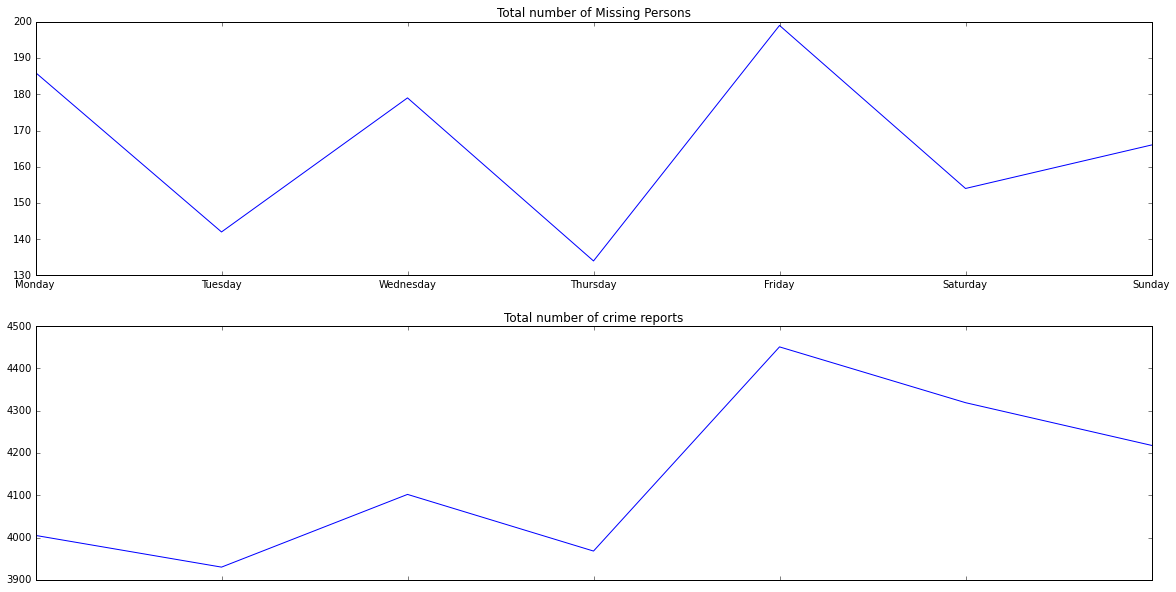

In [24]:
junk = f, axarr = plt.subplots(2, 1, figsize = [20,10])
junk = axarr[0].plot(test12.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']])
junk = axarr[0].set_title('Total number of Missing Persons')
junk = axarr[1].plot(test1.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']])
junk = axarr[1].set_title('Total number of crime reports')
junk = axarr[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
junk = axarr[1].set_xticklabels(['', '', '', '', '', '', ''])
#axarr[1, 0].plot(x, y ** 2)
#axarr[1, 0].set_title('Axis [1,0]')
#axarr[1, 1].scatter(x, y ** 2)
#axarr[1, 1].set_title('Axis [1,1]')

The plot above explores one of the possible theories to explain this phenomenon - perhaps the SFPD or the relevant department is swamped with work on Tuesdays and Wednesdays, and it's just has more time to deal with cases on Fridays and Mondays?

However, plotting the number both Missing Cases and all crimes against day of the week, this does not seem to be the case. There is in fact a large uptick of reports on Friday of both crimes in general and Missing Person cases on Friday. So Fridays see not only more reports, but a greater proportion are solved!

In [25]:
timeline = pd.to_datetime(SF_Missing_People.Date + ' ' + SF_Missing_People.Time)

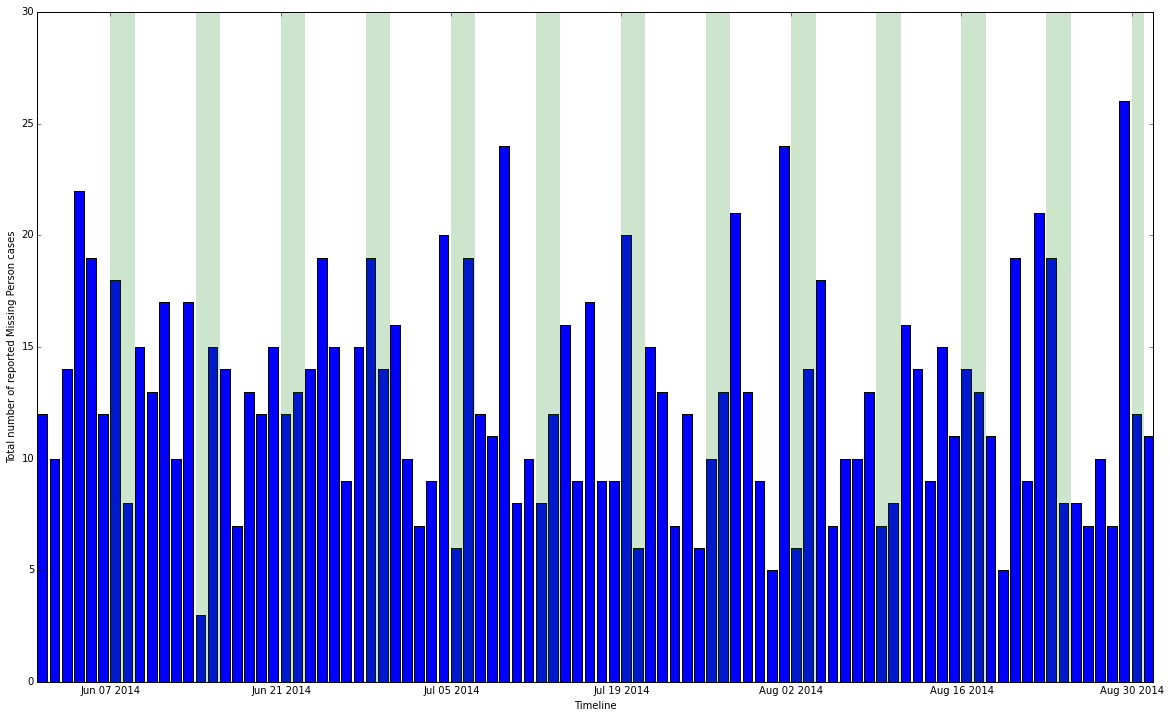

In [26]:
fig, ax = plt.subplots(figsize=(20,12))
test3 = pd.Series(SF_Missing_People.R_indicater.values[::-1], timeline[::-1]).resample('D', how = 'count')#.plot(figsize = [20,12])
#test3.hist(bins = 10)
def find_weekend_indices(datetime_array):
    indices=[]
    for i in range(len(datetime_array)):
        if datetime_array[i].weekday()>=5:
            indices.append(i)
    return indices

def highlight_weekend(weekend_indices):
    i=0
    while i<len(weekend_indices):
         plt.axvspan(test3.index[weekend_indices[i]], test3.index[weekend_indices[i]+2], facecolor='green', edgecolor='none', alpha=.2)
         i+=2
        
plt.bar(test3.index, test3.values)
highlight_weekend(find_weekend_indices(test3.index)[1:-2])
#find_weekend_indices(test3.index)
plt.axvspan(test3.index[0], test3.index[0], facecolor='green', edgecolor='none', alpha=.2)
plt.axvspan(test3.index[-2], test3.index[-1], facecolor='green', edgecolor='none', alpha=.2)

plt.xlabel('Timeline')
plt.ylabel('Total number of reported Missing Person cases')

This last plot shows a timeline of Missing Person cases per day over the three months. The green shaded regions are the weekends, to help the reader easier parse out the weeks by eye. 

Missing Person cases is a relatively small subset of the total crime data - 1162 of 28993 total crimes. With such a relatively small number, it could be the case that we suffer from outliers influencing our insights. Perhaps there was just one Friday that saw a lot of successful Missing Person cases.

However, the plot show this is not the case. While there is high variablilty of the number of cases, this variablity is consistant through the summer of 2014, and doesn't depend on the name of the week.